In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
%matplotlib inline

In [880]:
# URL of the data file on GitHub
url = 'https://raw.githubusercontent.com/AnkitShrivastava1/MLR-Bike-Sharing-Assignment/main/BikeSharingAssignment.csv'

In [883]:
df1 = pd.read_csv(url)
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [884]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [885]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<br></br>
Observations : 
1) So all values are non-null.
2) <b>'dteday'</b> is the only column with non-numeric values. Need to be converted into dataTime format.

Classification of Variables/Features
1) dteday : Date : <b>Ordered Categorical</b>
2) season : <b>Unordered Categorical</b>
3) yr : <b>Ordered Categorical</b>
4) month : <b>Ordered Categorical</b>
5) holiday : <b>Ordered Categorical</b>
6) weekday : <b>Ordered Categorical</b>
7) weathersit : <b>Unordered Categorical</b>
8) workingday : <b>Unorderd Categorical</b>
9) temp : Numerical
10) atemp : Numerical
11) hum : Numerical
12) windspeed : Numerical
13) casual : Numerical
14) registered : Numerical
15) cnt : Numerical

- So there are <b>8</b> <u>Categorical</u> Features and <b>7</b> <u>Numerical</u> Features

In [886]:
# Finding the shape of the dataframe df1
df1.shape

(730, 16)

In [887]:
# Lets find if there are any outliers 
df1.describe(percentiles=[0.25,0.5,0.75,0.80,0.9,0.95,0.99]).round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
80%,584.20,4.00,1.0,10.00,0.00,5.00,1.00,2.00,28.13,31.88,75.29,16.64,1263.20,5116.40,6393.20
90%,657.10,4.00,1.0,11.00,0.00,6.00,1.00,2.00,30.00,33.91,81.76,19.83,1872.00,5895.40,7293.80
95%,693.55,4.00,1.0,12.00,0.00,6.00,1.00,2.00,31.52,35.75,86.87,23.00,2355.00,6280.55,7576.40


<br></br>
Observations :
- No Outliers are visible/visibly inferred at first glance from the data above.

In [888]:
# Checking some value counts for some features
print(df1['season'].value_counts(),'\n', 
     df1['yr'].value_counts(),'\n',
     df1['holiday'].value_counts(),'\n',
     df1['weekday'].value_counts(),'\n',
     df1['weathersit'].value_counts(),'\n',
     df1['workingday'].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 
 yr
0    365
1    365
Name: count, dtype: int64 
 holiday
0    709
1     21
Name: count, dtype: int64 
 weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 
 weathersit
1    463
2    246
3     21
Name: count, dtype: int64 
 workingday
1    499
0    231
Name: count, dtype: int64


In [889]:
# Removing the column 'instant' as it is a REDUNDANT column (same as index)
# Removing the column 'casual' and 'registered' as these columns are just CONSTITUENT columns of target variable 'cnt'
# Basically 'casual' + 'registered' = 'cnt'. 
# So these columns may give rise to MULTICOLLINEARITY and they are REDUNDANT as they do not add any new info to the dataframe
df1 = df1.drop(columns = ['instant','casual','registered'], axis = 1)


In [890]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [891]:
# Defining the numerical variables into a list
num_vars = ['temp', 'atemp', 'hum','windspeed', 'cnt']

<Figure size 2000x1500 with 0 Axes>

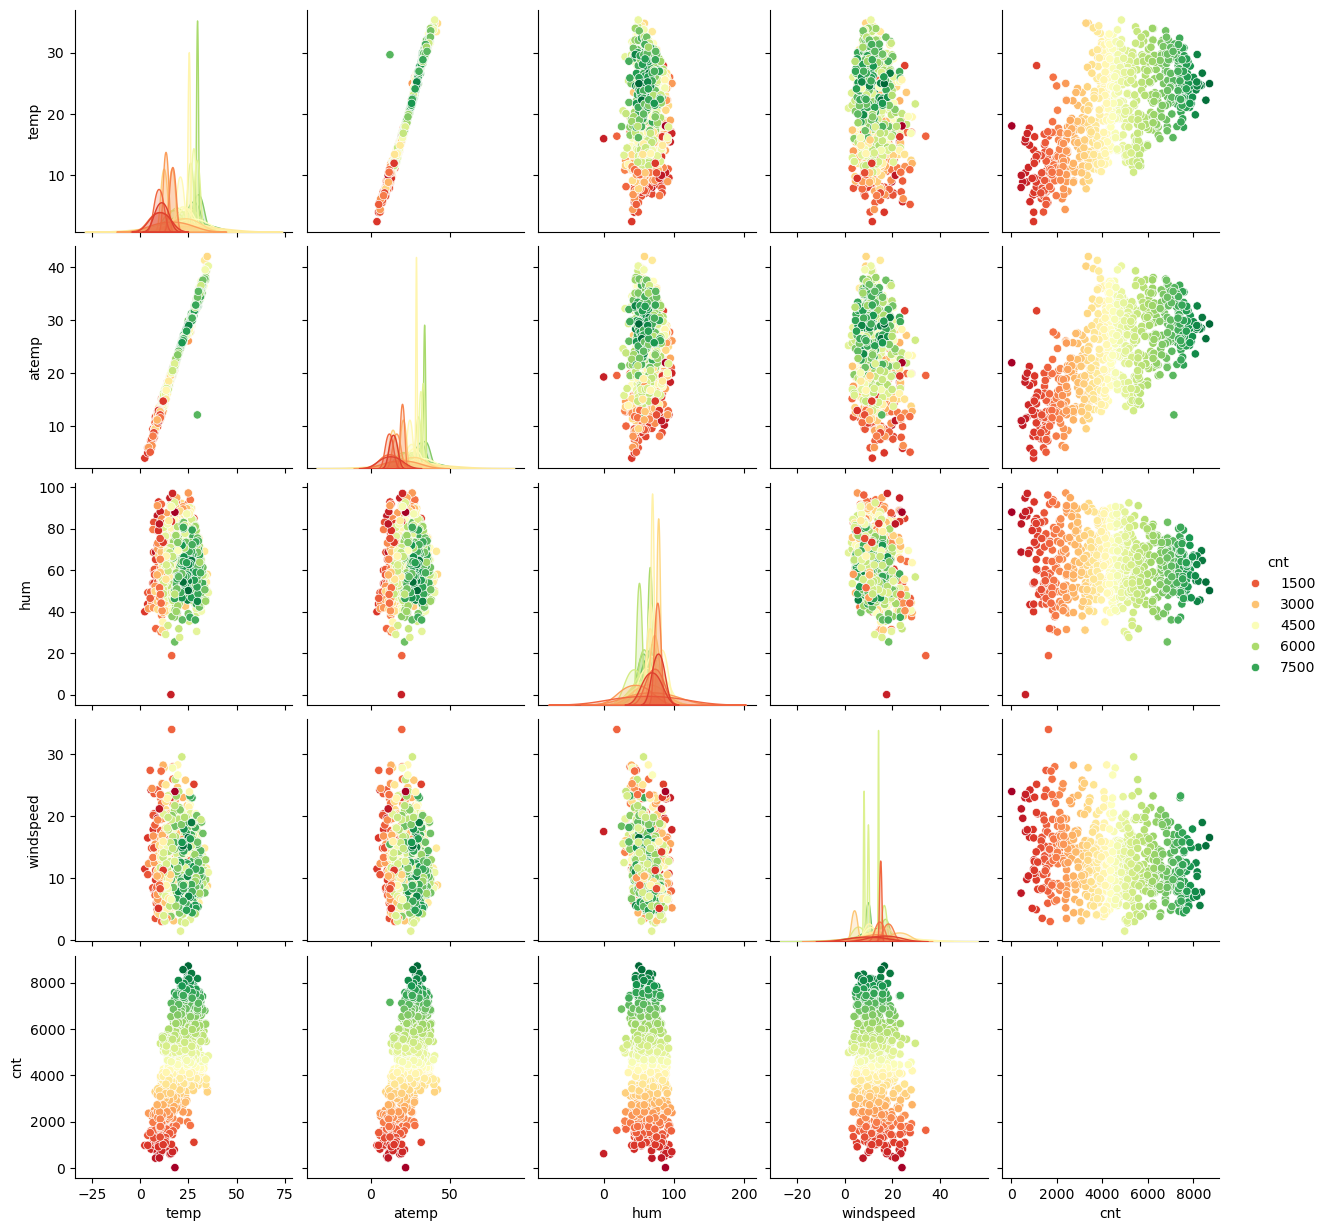

In [892]:
# Drawing a pairplot for numerical variables to find any trends in data 
plt.figure(figsize = (20,15))
sns.pairplot(df1, hue = 'cnt', vars = num_vars, palette = 'RdYlGn', diag_kind = 'auto')
plt.show()

<b>INSIGHTS from the Pairplot</b>
* temp: Higher cnt values are associated with higher temperatures, suggesting more rentals in warmer weather.
* atemp: Similar to temp, higher adjusted temperatures correspond to increased cnt values.
* hum: A slight negative correlation indicates fewer rentals on more humid days.
* windspeed: No clear relationship with cnt, implying windspeed doesn't significantly impact rentals.

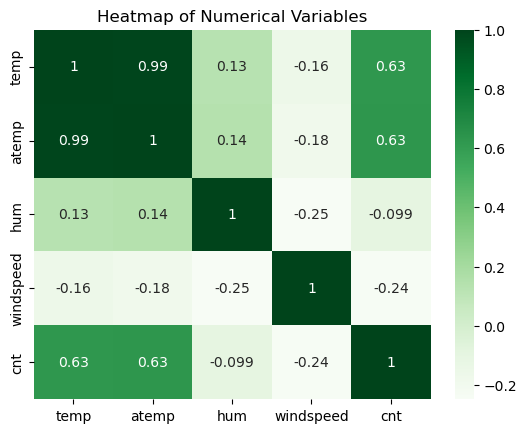

In [893]:
# Making a heatmap for NUMERICAL variables
df1[num_vars].corr()
sns.heatmap(df1[num_vars].corr(), annot=True, cmap = 'Greens')
plt.title('Heatmap of Numerical Variables')
plt.show()

<b>Insight : From heatmap of NUMERICAL variables</b>

As expected there is 'high & positive' correlation of <b>'cnt'</b> with -
- temp (0.63)
- atemp(0.63)
- windspeed (-0.24)

'Very low and negative' correlations found for -
- hum (-0.099)


In [894]:
# Converting 'dteday' column to DateTimeFormat
df1['dteday'] = pd.to_datetime(df1['dteday'],format='%d-%m-%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.3 KB


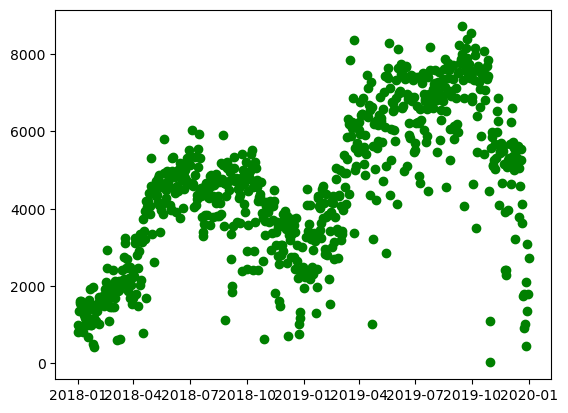

In [895]:
# Plotting 'dteday' against 'cnt' to se if any trends emerge 
plt.scatter(df1['dteday'], df1['cnt'], color='green')
plt.show()

<br></br>
No CLEAR pattern seems visible between <b>'dteday'</b> and <b>'cnt'</b>

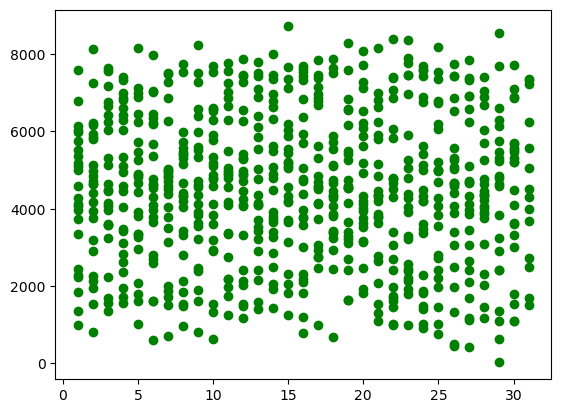

In [896]:
# Getting the dates from 'dteday' column to see if there is any trend for any specific dates 
df1['dayValue'] = df1['dteday'].dt.day       # Introducing a new column 'dayValue' as dates from 'dteday'

# Scatter plot between dayValue and cnt
plt.scatter(df1['dayValue'], df1['cnt'], color = 'green')
plt.show()

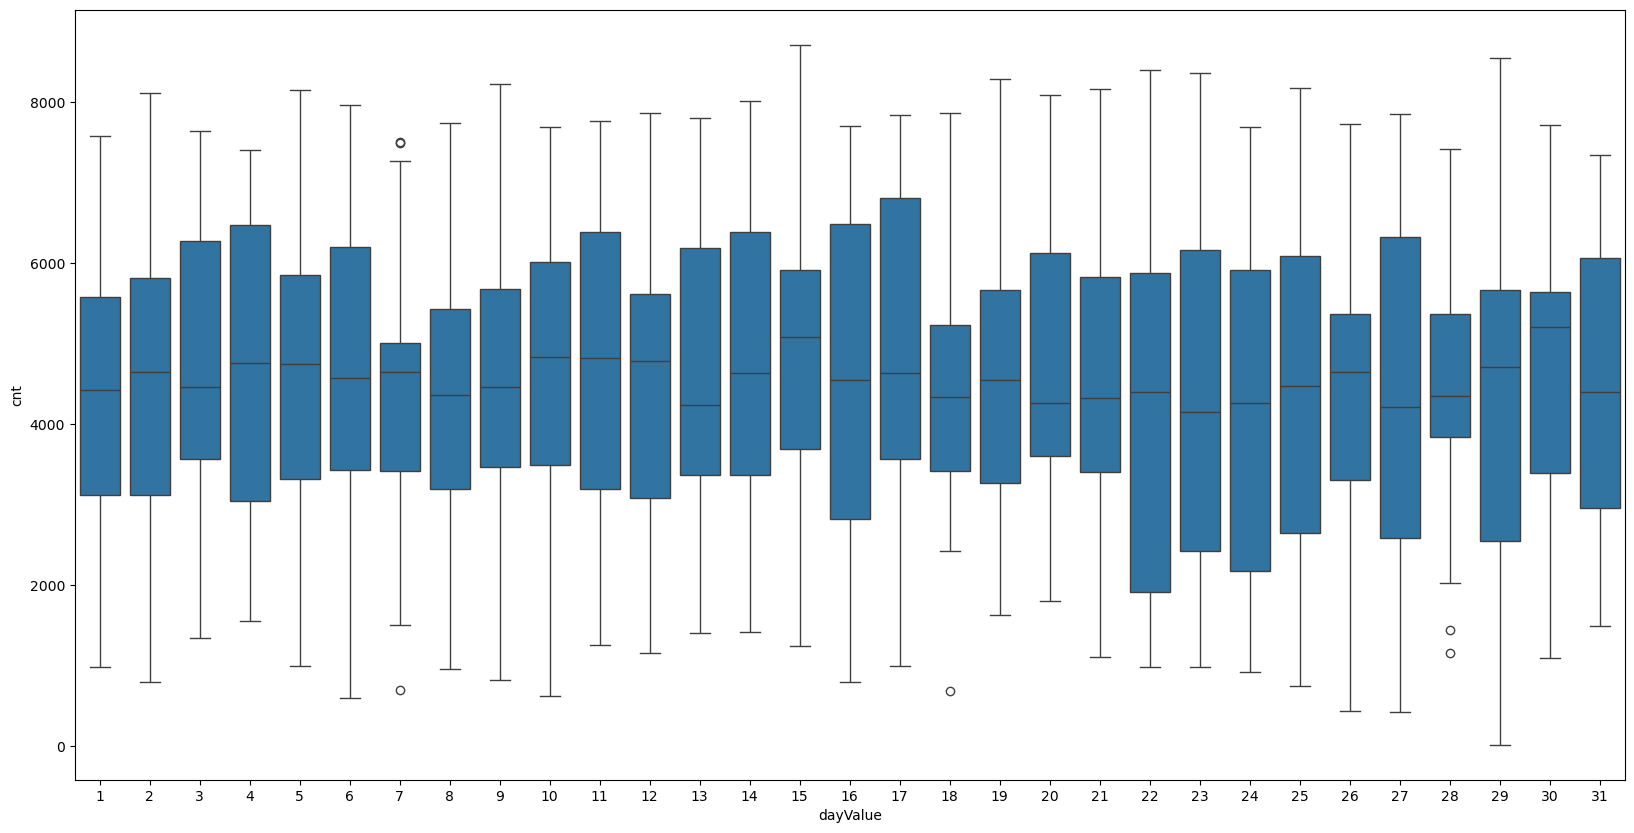

In [897]:
# Getting a boxplot for dayValues to see for any trends
plt.figure(figsize = (20,10))
sns.boxplot(x ='dayValue', y = 'cnt', data = df1)
plt.show()

<b>INSIGHT from Scatterplot and Boxplot of 'dayValue'</b>

No significant trend observed for <b>'dayValue'</b> and <b>'cnt'</b>. 

Hence both <b>'dteday'</b> and <b>'dayValue</b> <u>can be dropped</u> from the dataframe as they are not very useful AND the data for month, year, weekday, weekend and season are already present as COLUMNS/FEATURES in the dataframe

In [898]:
df1.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'dayValue'],
      dtype='object')

In [899]:
# Dropping 'dteday' and 'dayValue' from dataframe
df1 = df1.drop(columns = ['dteday','dayValue'])

In [900]:
df1.columns  # 'dteday' and 'dayValue' columns are now GONE

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [901]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [902]:
# Checking for CATEGORICAL VARIABLES for any trends 

# Defining all the CATEGORICAL VARIABLES as a list 
cat_vars = ['season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit']

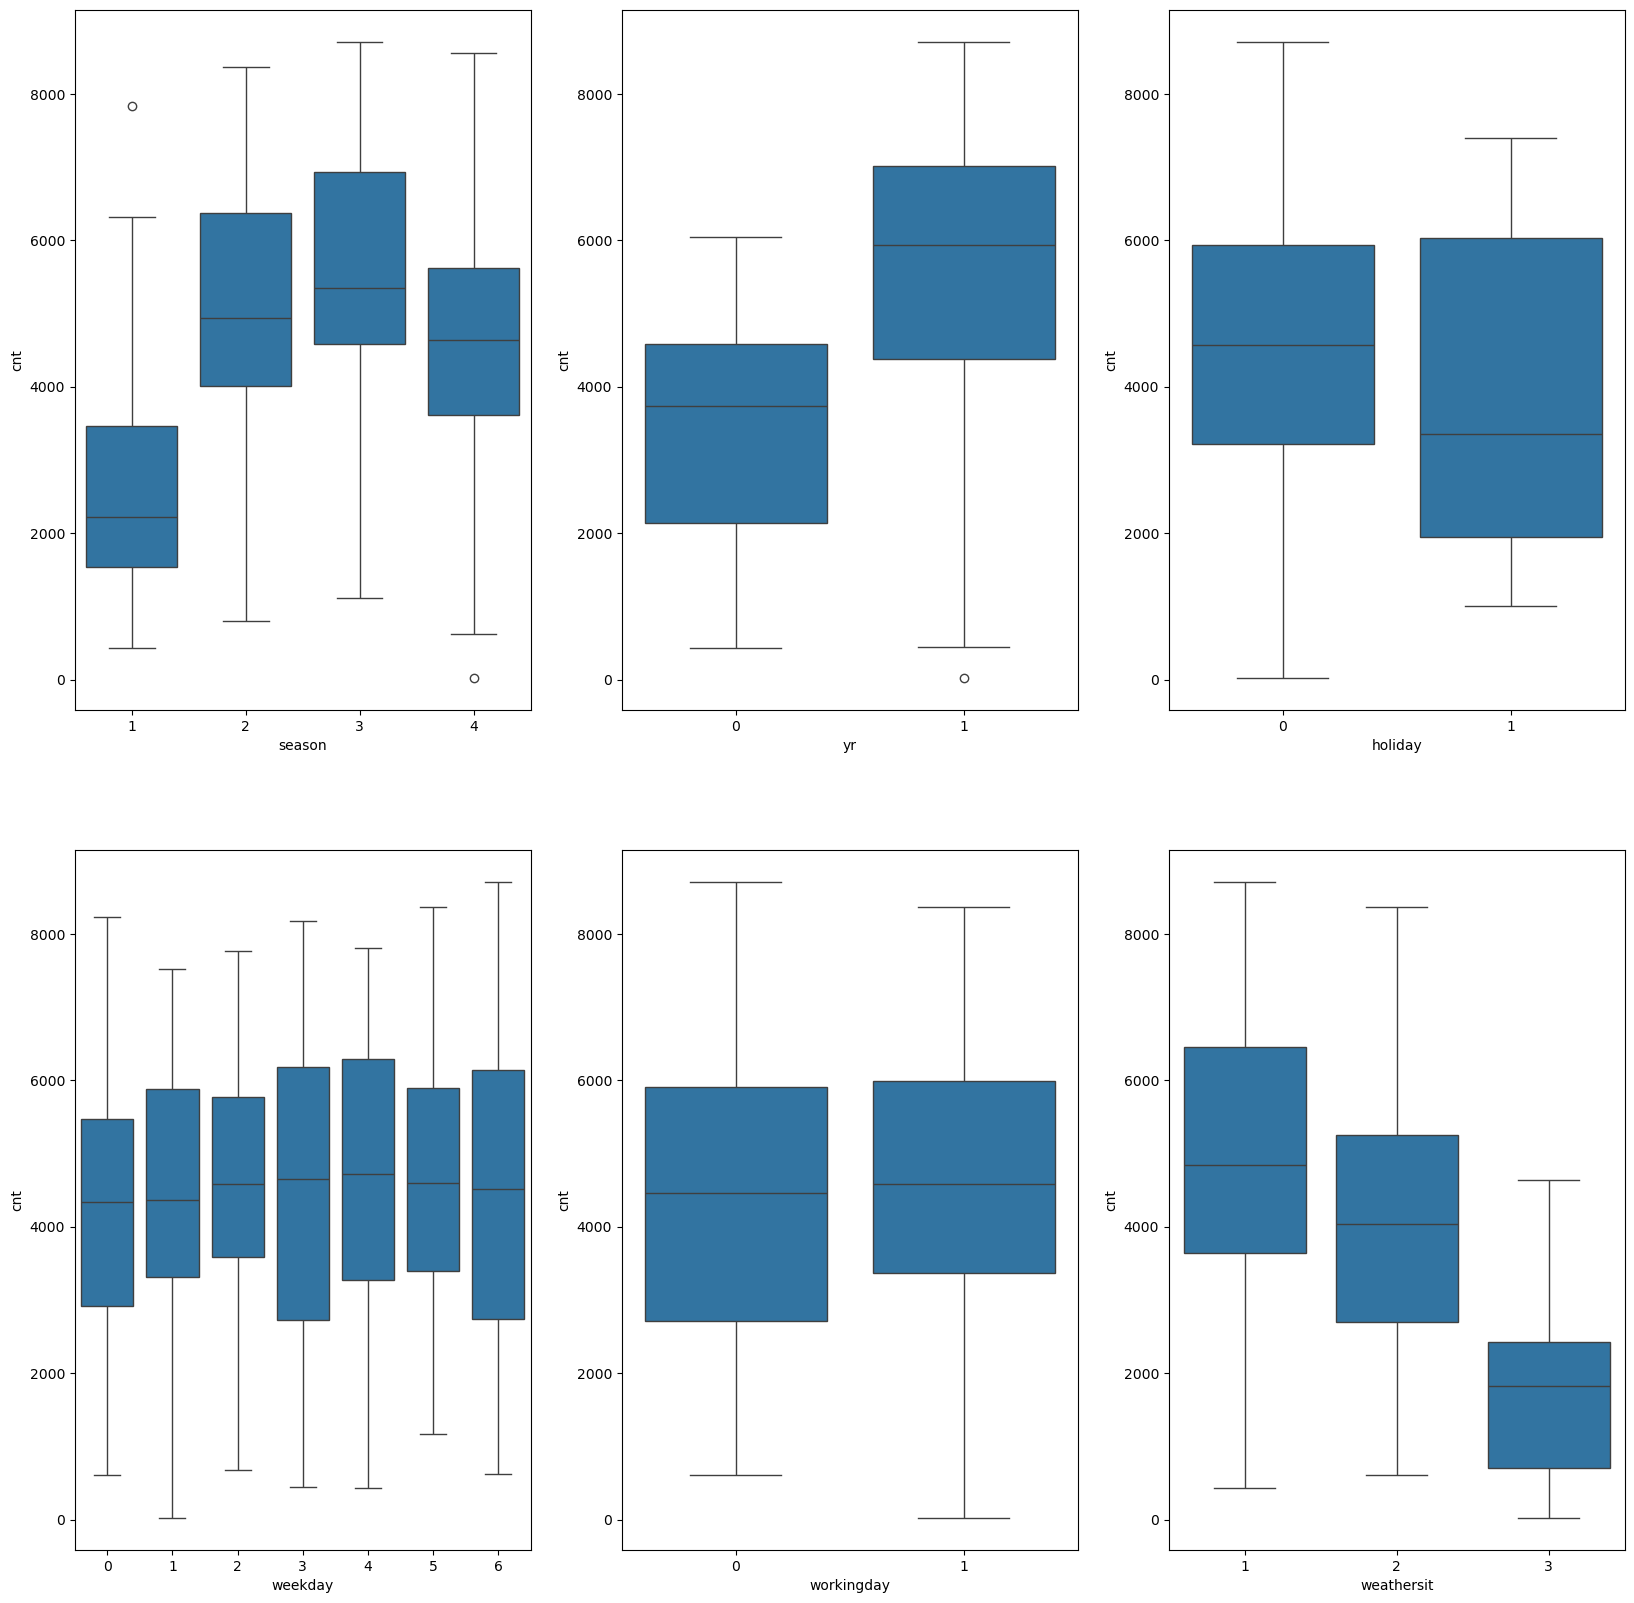

In [903]:
# Plotting boxplots to figure out if there are any Trends for CATEGORICAL fetaures
plt.figure(figsize = (20,20))


plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data = df1)

plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data = df1)

plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data = df1)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data = df1)

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data = df1)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data = df1)


plt.show()

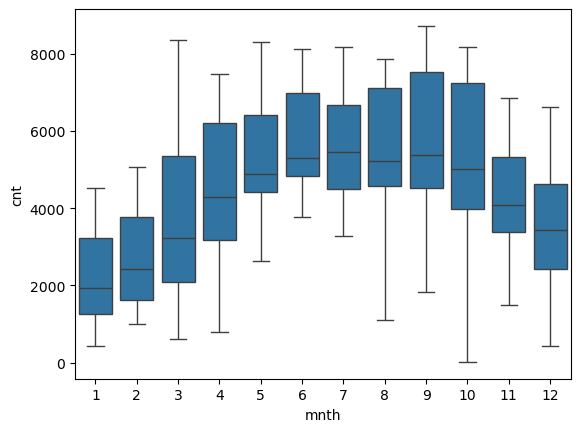

In [904]:
sns.boxplot(x= 'mnth', y = 'cnt', data = df1)
plt.show()

### INSIGHTS from the Boxplots of Categorical Variables Above

- Season     : Considerable increase in bookings in <b>summer, fall & winter</b> as compared to <b>spring</b>

- yr         : 2019 saw greater number of booking as compared to 2018

  
- holiday    : Greater bookings when there is <b>NO HOLIDAY</b> as compared to on Holidays.

  
- weekday    : <b>No significant</b> variation among weekdays. Expecting a very weak correlation or dependence with 'cnt'

  
- workingday : <b>No significant</b> variation or trend observed. Expecting a very correlation with 'cnt'

  
- weathersit : High bookings observed for <b>Clear(1) and Cloudy/Misty(2)</b> conditions and Lower bookings on <b>Snowy/Rainy (3)</b> conditions. NO BOOKINGS made on Heavy Rains/Foggy/High Snow conditions.

  
- mnth       : Relatively very <u>High bookings</u> made in <b>summer to early winter months (4th to 10th month)</b>and then <u>bookings drop</u> significantly in <b>winter months (11th to 3rd)</b>. Expecting a high correlation between 'mnth' and 'cnt'



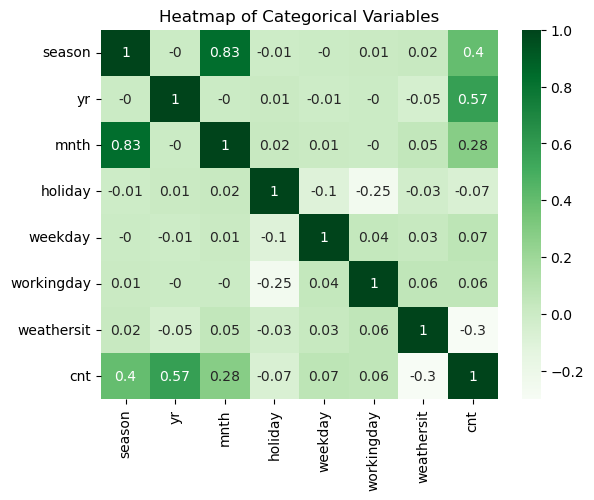

In [905]:
# Defining all CATEGORICAL features/variables with 'cnt' for getting a heatmap
cat2 = ['season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit','cnt']

#Plotting heatmap of all CATEGORICAL FEATURES with Target Variable 'cnt'
sns.heatmap(df1[cat2].corr().round(2), annot=True, cmap = 'Greens')
plt.title("Heatmap of Categorical Variables")
plt.show()

<b>INSIGHT from the heatmap of CATEGORICAL VARIABLES with 'cnt' </b><br></br>
As expected significant correlations found for
- season (0.4)
- yr (0.57)
- mnth (0.28)
- weathersit (-0.3)

And Very Feeble correlations found for 
- holiday (-0.07)
- weekday (0.07)
- workingday (0.06)

In [906]:
# Checking df1 before going for encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [907]:
## Encoding the Categorical Variables for MLR using OneHotEncoder from sklearn

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

<b>INSIGHT :</b> Since Feature columns <b>'yr', 'workingday'</b> and <b>'holiday'</b> are already having only 1s and 0s as values,
we will not encode these feature columns.

In [908]:
# Getting Encoding ready Categorical Features as a list 
cat_enc_features = ['season', 'mnth','weekday', 'weathersit']

In [909]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Using fit_transform for Encoding
encoded_features = encoder.fit_transform(df1[cat_enc_features])

In [910]:
# Creating a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_enc_features))
encoded_df.head()

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [911]:
# Concatenating encoded features with the original DataFrame

# Dropping original feature/variable names from df1
df1 = df1.drop(columns=cat_enc_features)

# Concatenating encoded features with resulting df1
df1e = pd.concat([df1, encoded_df], axis=1)

In [912]:
df1e.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<b>INSIGHT: </b>Resulting dataframe has 30 columns. This dataframe is stripped of original columns in df1 ['season', 'mnth','weekday', 'weathersit']

And Instead have encoded values for these Categorical Columns

In [913]:
# Checking the encoded dataframe 'df1e'
df1e.describe().round(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,...,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.5,0.03,0.68,20.32,23.73,62.77,12.76,4508.01,0.25,0.26,...,0.08,0.08,0.14,0.14,0.14,0.14,0.14,0.14,0.34,0.03
std,0.5,0.17,0.47,7.51,8.15,14.24,5.20,1936.01,0.43,0.44,...,0.27,0.28,0.35,0.35,0.35,0.35,0.35,0.35,0.47,0.17
min,0.0,0.00,0.00,2.42,3.95,0.00,1.50,22.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.0,0.00,0.00,13.81,16.89,52.00,9.04,3169.75,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.5,0.00,1.00,20.47,24.37,62.62,12.13,4548.50,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.0,0.00,1.00,26.88,30.45,72.99,15.63,5966.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.0,1.00,1.00,35.33,42.04,97.25,34.00,8714.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [914]:
# Checking Column names for encoded dataframe df1e
df1e.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### SPLITTING the dataframe df1e into Training and Test datasets

In [915]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# SPlitting the df1e dataframe into TWO DATAFRAMES : Training Data (df1e_train) and Test Data (df1e_test)
df1e_train, df1e_test = train_test_split(df1e, random_state = 100, shuffle = False, train_size = 0.7)

In [916]:
# Checking the splitted dataframes
print(df1e_train.shape, df1e_test.shape)

(510, 30) (220, 30)


#### NOW we move to scaling the NUMERICAL FEATURES to make our dataframe ready (preprocessed) for regression

SCALING THE NUMERICAL VARIABLES OF TRAINING DATA <b>df1e_train</b><br></br>
So we have 5 numerical variables (including Target Variable) :
* temp
* atemp
* hum
* windspeed
* cnt
<br></br>
We will have to scale them as their values vary a lot and hence if regressed in current condition, their coefficients might dwarf other variables that have just 0 and 1 as their values.

In [917]:
# Using MinMax scaler from sklearn for SCALING steps

# Putting ALL Numerical variable columns in a list 
num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df1e_train[num_features].head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


In [918]:
# Initiating the minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler_1e = MinMaxScaler()

In [919]:
# Scaling the values in numerical columns 

df1e_train[num_features] = scaler_1e.fit_transform(df1e_train[num_features])

In [920]:
# Checking whether numerical columns have been scaled or not.
df1e_train.describe().round(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,...,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.28,0.03,0.69,0.52,0.49,0.64,0.36,0.42,0.31,0.18,...,0.06,0.06,0.14,0.14,0.14,0.14,0.14,0.14,0.34,0.03
std,0.45,0.16,0.46,0.23,0.21,0.16,0.16,0.20,0.46,0.39,...,0.24,0.24,0.35,0.35,0.35,0.35,0.35,0.35,0.47,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.33,0.31,0.52,0.24,0.26,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.51,0.49,0.65,0.34,0.45,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.71,0.65,0.76,0.45,0.55,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [921]:
# Sccaling the values of the TEST set df1e_test also
df1e_test[num_features] = scaler_1e.transform(df1e_test[num_features])

In [922]:
# Checking the TEST SET df1e_test
df1e_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.031818,0.677273,0.638545,0.595923,0.647195,0.318558,0.721574,0.118182,0.427273,...,0.136364,0.140909,0.145455,0.140909,0.140909,0.140909,0.140909,0.145455,0.327273,0.018182
std,0.0,0.175916,0.468586,0.221487,0.202573,0.119408,0.151729,0.208692,0.323559,0.495811,...,0.343957,0.348721,0.353363,0.348721,0.348721,0.348721,0.348721,0.353363,0.470288,0.133913
min,1.0,0.000000,0.000000,0.198349,0.185427,0.342908,0.050010,-0.051570,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.416166,0.408120,0.557734,0.220508,0.633905,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.687778,0.647002,0.641174,0.294875,0.778086,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,1.000000,0.831231,0.755791,0.723758,0.396477,0.878136,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.015822,0.952767,0.951157,0.793604,1.044383,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### INSIGHT
So all <b>NUMERICAL</b> features have been scaled now including target variable 'cnt' for <b>BOTH TRAINING & TEST</b> datasets

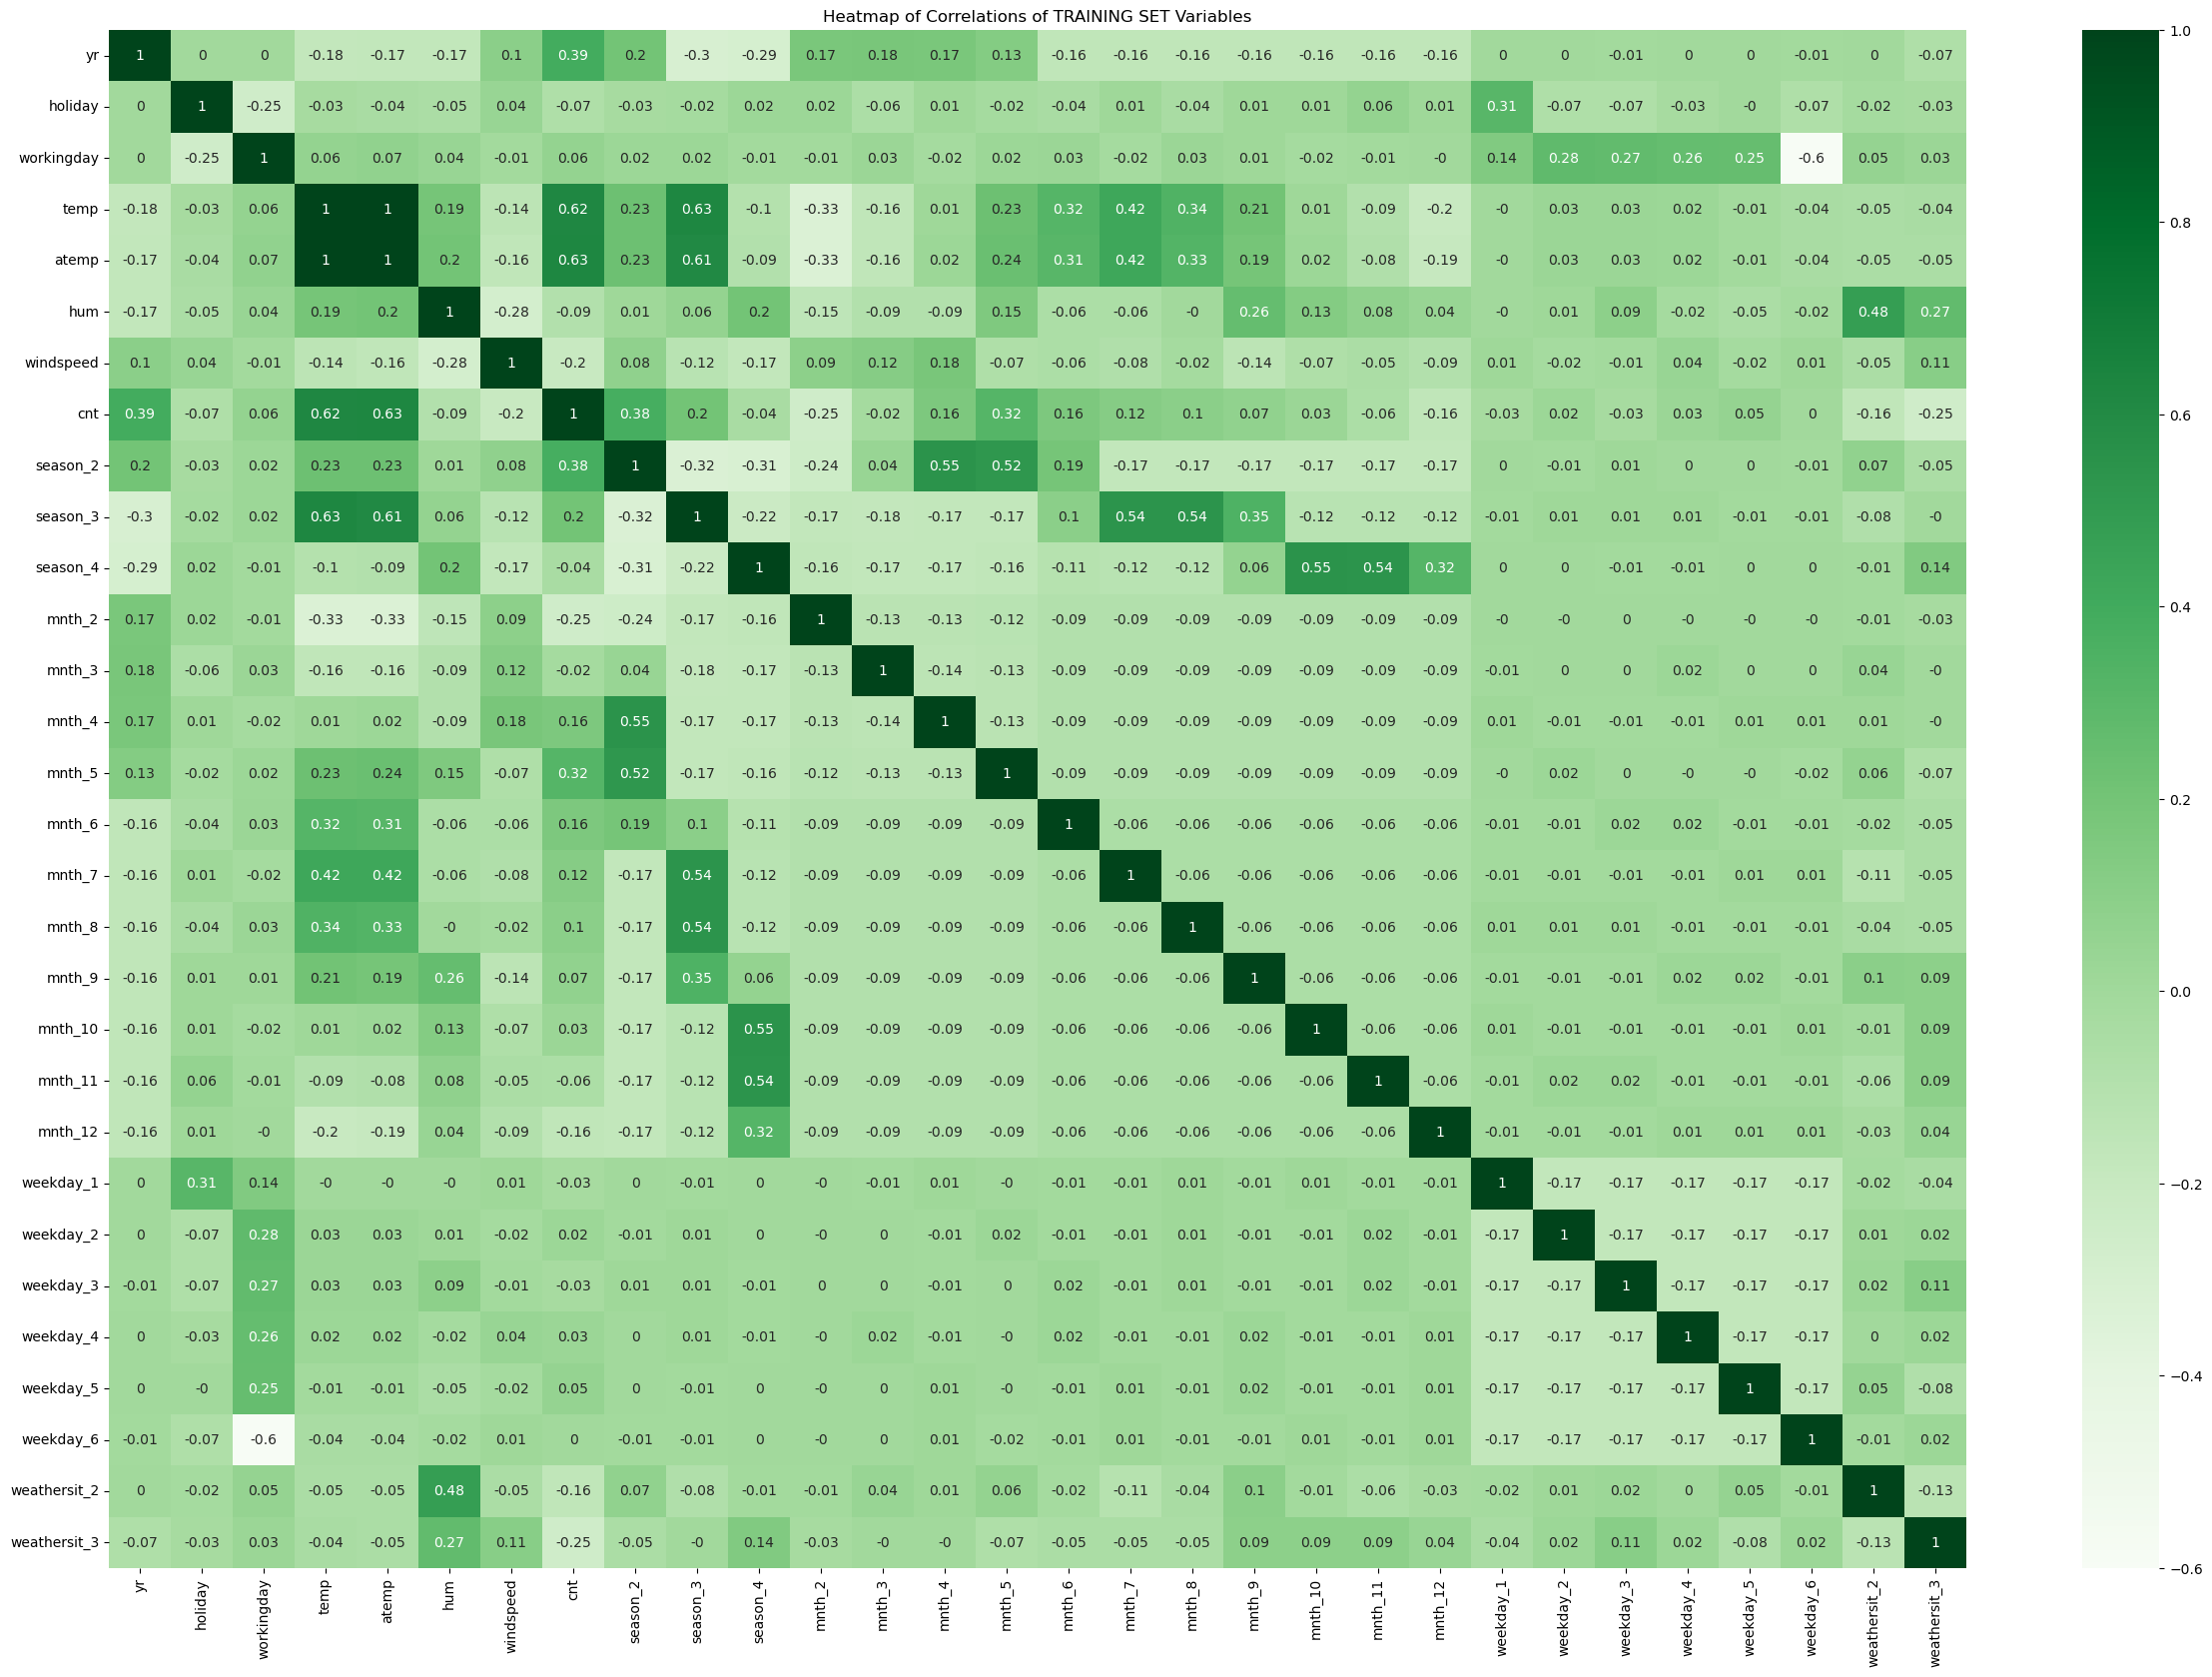

In [923]:
# Plotting a heatmap to see correlations for the TRAINING SET df1e_train
plt.figure(figsize = (30,20))
sns.heatmap(df1e_train.corr().round(2), annot=True, cmap = 'Greens')
plt.title('Heatmap of Correlations of TRAINING SET Variables')
plt.show()

In [924]:
# For visual clarity, getting Correlation values of all variables with target variable 'cnt' in DESCENDING order
corr_matrix = df1e_train.corr()
target_corr = corr_matrix['cnt'].round(4)
target_corr.sort_values(ascending = False)

cnt             1.0000
atemp           0.6311
temp            0.6206
yr              0.3930
season_2        0.3807
mnth_5          0.3163
season_3        0.2000
mnth_4          0.1583
mnth_6          0.1556
mnth_7          0.1223
mnth_8          0.0982
mnth_9          0.0709
workingday      0.0561
weekday_5       0.0507
mnth_10         0.0299
weekday_4       0.0278
weekday_2       0.0205
weekday_6       0.0009
mnth_3         -0.0248
weekday_3      -0.0256
weekday_1      -0.0325
season_4       -0.0388
mnth_11        -0.0619
holiday        -0.0712
hum            -0.0875
weathersit_2   -0.1554
mnth_12        -0.1576
windspeed      -0.1963
mnth_2         -0.2501
weathersit_3   -0.2501
Name: cnt, dtype: float64

#### Splitting training dataset df1e_train
<b>Splitting df1_train into X_train, y_train for modelling purposes</b>

In [925]:
y_train = df1e_train['cnt']
X_train = df1e_train.drop(columns = 'cnt', axis =1)

In [926]:
# Checking X_train and y_train. 
print(X_train.shape, y_train.shape)

(510, 29) (510,)


In [927]:
# Checking X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [928]:
# Checking y_train values
y_train.head()

0    0.069852
1    0.046652
2    0.115748
3    0.142605
4    0.147396
Name: cnt, dtype: float64

#### USING RFE to get an initial estimate of all the RELEVANT variables. Later we will use VIF and p-values to figure out model  

In [929]:
# Importing RFE
from sklearn.feature_selection import RFE

# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression

# Inititating Linear Regressor model
model_rfe1 = LinearRegression()

In [930]:
# Instantiating RFE with the desired number of features to select
rfe = RFE(estimator=model_rfe1, n_features_to_select=10)

In [931]:
# Fit RFE on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [932]:
# Getting the support or selected features
selected_features = rfe.support_
selected_feature_names = X_train.columns[selected_features]

In [933]:
# Get the ranking of features
feature_ranking = rfe.ranking_

In [934]:
print("Selected Features:", selected_feature_names)
print("Feature Ranking:", feature_ranking)

Selected Features: Index(['yr', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'mnth_5', 'mnth_9', 'weathersit_3'],
      dtype='object')
Feature Ranking: [ 1  6 15  5  1  1  1  1  1  1 14  4  3  1  2 11 17  1  7  9  8 16 20 19
 18 12 13 10  1]


In [935]:
results_df = pd.DataFrame({'Feature': X_train.columns,'Ranking': feature_ranking, 'Support':rfe.support_})

results_df = results_df.sort_values(by='Ranking')
results_df

,Feature,Ranking,Support
0,yr,1,True
17,mnth_9,1,True
13,mnth_5,1,True
9,season_4,1,True
8,season_3,1,True
7,season_2,1,True
28,weathersit_3,1,True
5,hum,1,True
4,atemp,1,True
6,windspeed,1,True


<b>INSIGHT: </b> RFE has predicted the <b>Top 10</b> Features that impacts the model. We will choose only the features that have <b>Rank=1</b>

We will now - 
* Create a subset of these features for the model
* Run VIF and p-Value analysis to find the most relevant features and remove multicollinearity if any in the model

In [936]:
# Create subset of relevant features
col = ['yr', 'mnth_9', 'mnth_5', 'season_4', 'season_3', 'season_2', 'weathersit_3', 'hum', 'atemp', 'windspeed']
col

['yr',
 'mnth_9',
 'mnth_5',
 'season_4',
 'season_3',
 'season_2',
 'weathersit_3',
 'hum',
 'atemp',
 'windspeed']

In [937]:
# Subset the training data with the selected features
X_train_sel = X_train[col]

In [938]:
# Checking the dataset 
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   mnth_9        510 non-null    float64
 2   mnth_5        510 non-null    float64
 3   season_4      510 non-null    float64
 4   season_3      510 non-null    float64
 5   season_2      510 non-null    float64
 6   weathersit_3  510 non-null    float64
 7   hum           510 non-null    float64
 8   atemp         510 non-null    float64
 9   windspeed     510 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 43.8 KB


<br></br>
#### Building the 1st MLR model

In [939]:
# Using STATSMODELS to check for multicollinearity and significance of coefficients

# Adding a constant (intercept) to the model
X_train_const = sm.add_constant(X_train_sel)

# Fit the OLS model
ols_model_1 = sm.OLS(y_train, X_train_const).fit()

# Getting the summary
ols_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.21e-176
Time:                        20:05:47   Log-Likelihood:                 529.80
No. Observations:                 510   AIC:                            -1038.
Df Residuals:                     499   BIC:                            -991.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2337      0.024      9.563      0.000       0.186       0.282
yr               0.2452      0.010     25.158      0.000       0.226       0.264
mnth_9           0.0660      0.018      3.617      0.000       0.030       0.102
mnth_5           0.0420      0.015      2.802      0.005       0.013       0.072
season_4         0.1781      0.014     13.009      0.000       0.151       0.205
season_3         0.0755      0.020      3.794      0.000       0.036       0.115
season_2         0.1158      0.013      8.806      0.000       0.090       0.142
weathersit_3    -0.1653      0.023     -7.184      0.000      -0.210      -0.120
hum             -0.2743      0.029     -9.534      0.000      -0.331      -0.218
atemp            0.5603      0.032     17.695      0.000       0.498       0.623
windspeed       -0.1623      0.026     -6.293      0.000      -0.213      -0.112
==============================================================================
Omnibus:                       48.944   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.846
Skew:                          -0.496   Prob(JB):                     5.74e-27
Kurtosis:                       5.169   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>INSIGHTS</b>
* Model's parameters have the following values
  - Adjusted R Squared = 81.2%
  - F-Stat = 221
  - AIC = -1038
  - BIC = - 991

** Thus the model above demonstrates a strong fit and statistical significance
* p-Values all seem to be within 5% level, so coefficients seem good.
* We will now check for multicollinearity and remove features one by one

In [940]:
# Checking VIF for the model above 

# Importing VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [941]:
# Checking for VIF for ols_model_1
vif = pd.DataFrame()
vif['Feature'] = X_train_sel.columns
vif['VIF'] = [variance_inflation_factor(X_train_sel.values, i) for i in range(X_train_sel.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
8,atemp,17.73
7,hum,10.38
4,season_3,4.96
9,windspeed,4.45
5,season_2,3.64
3,season_4,2.21
0,yr,1.74
2,mnth_5,1.65
1,mnth_9,1.32
6,weathersit_3,1.13


In [942]:
# We see that atemp (17.73) and hum(10.38) have high VIFs. Hence there is a high chance of multicollinearity
# We will first remove 'atemp' and then evaluate.

### Building the 2nd MLR model

In [943]:
X_train_selA = X_train_sel.drop(columns = 'atemp', axis = 1)
X_train_selA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   mnth_9        510 non-null    float64
 2   mnth_5        510 non-null    float64
 3   season_4      510 non-null    float64
 4   season_3      510 non-null    float64
 5   season_2      510 non-null    float64
 6   weathersit_3  510 non-null    float64
 7   hum           510 non-null    float64
 8   windspeed     510 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.8 KB


In [944]:
# Adding a constant (intercept) to the model
X_train_constA = sm.add_constant(X_train_selA)

# Fit the OLS model
ols_model_1A = sm.OLS(y_train, X_train_constA).fit()

# Getting the summary
ols_model_1A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          6.10e-125
Time:                        20:05:47   Log-Likelihood:                 405.60
No. Observations:                 510   AIC:                            -791.2
Df Residuals:                     500   BIC:                            -748.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3506      0.030     11.689      0.000       0.292       0.409
yr               0.2620      0.012     21.199      0.000       0.238       0.286
mnth_9           0.0349      0.023      1.510      0.132      -0.011       0.080
mnth_5           0.0902      0.019      4.798      0.000       0.053       0.127
season_4         0.2683      0.016     16.573      0.000       0.237       0.300
season_3         0.3454      0.016     21.177      0.000       0.313       0.377
season_2         0.2464      0.014     17.758      0.000       0.219       0.274
weathersit_3    -0.2086      0.029     -7.155      0.000      -0.266      -0.151
hum             -0.1982      0.036     -5.467      0.000      -0.269      -0.127
windspeed       -0.1801      0.033     -5.482      0.000      -0.245      -0.116
==============================================================================
Omnibus:                       14.849   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.095
Skew:                          -0.007   Prob(JB):                     1.77e-07
Kurtosis:                       4.210   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### INSIGHT 
* When we dropped <b>'atemp'</b> from the model, then the R-squared fell from 81.2% to 69.5%, thus suggesting that <u>'atemp' explains a lot of the data variation</u> and hence <u>'atemp' cannot be dropped</u>.

* So now we will drop high p-value variable <b>'mnth_9'</b>

### Building the 3rd MLR model

In [945]:
X_train_sel.columns

Index(['yr', 'mnth_9', 'mnth_5', 'season_4', 'season_3', 'season_2',
       'weathersit_3', 'hum', 'atemp', 'windspeed'],
      dtype='object')

In [984]:
# Dropping the variable 'mnth_9' from the new dataframe

In [946]:
X_train_sel2 = X_train_sel.drop(columns = 'mnth_9', axis = 1)
X_train_sel2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   mnth_5        510 non-null    float64
 2   season_4      510 non-null    float64
 3   season_3      510 non-null    float64
 4   season_2      510 non-null    float64
 5   weathersit_3  510 non-null    float64
 6   hum           510 non-null    float64
 7   atemp         510 non-null    float64
 8   windspeed     510 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.8 KB


In [947]:
# Adding a constant (intercept) to the model
X_train_const2 = sm.add_constant(X_train_sel2)

# Fit the OLS model
ols_model_2 = sm.OLS(y_train, X_train_const2).fit()

# Getting the summary
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          8.64e-175
Time:                        20:05:47   Log-Likelihood:                 523.20
No. Observations:                 510   AIC:                            -1026.
Df Residuals:                     500   BIC:                            -984.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2241      0.025      9.114      0.000       0.176       0.272
yr               0.2463      0.010     24.980      0.000       0.227       0.266
mnth_5           0.0407      0.015      2.679      0.008       0.011       0.071
season_4         0.1831      0.014     13.285      0.000       0.156       0.210
season_3         0.0948      0.019      4.881      0.000       0.057       0.133
season_2         0.1181      0.013      8.880      0.000       0.092       0.144
weathersit_3    -0.1639      0.023     -7.042      0.000      -0.210      -0.118
hum             -0.2514      0.028     -8.852      0.000      -0.307      -0.196
atemp            0.5493      0.032     17.221      0.000       0.487       0.612
windspeed       -0.1656      0.026     -6.350      0.000      -0.217      -0.114
==============================================================================
Omnibus:                       48.104   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.870
Skew:                          -0.504   Prob(JB):                     3.10e-25
Kurtosis:                       5.072   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [948]:
# Calculate VIF for each feature
vif2 = pd.DataFrame()
vif2['Feature'] = X_train_sel2.columns
vif2['VIF'] = [variance_inflation_factor(X_train_sel2.values, i) for i in range(X_train_sel2.shape[1])]
vif2['VIF']= round(vif2['VIF'],2)
vif2.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
7,atemp,17.43
6,hum,9.92
3,season_3,4.59
8,windspeed,4.38
4,season_2,3.63
2,season_4,2.19
0,yr,1.74
1,mnth_5,1.65
5,weathersit_3,1.13


### INSIGHT
* Since we kept <b>'atemp'</b> the Adj R-squared is now back to 80.8%, higher than 69.5% when 'atemp' was missing from model
* After removing <b>'mnth_9'</b> from model, the Adj R-squared value fell from 81.2% to 80.8%, hence not a significant drop. 
* Looking at p-Values, we find that p-Values are all within limits (<5%)
* So Now looking at VIF values, since we cannot remove atemp, we will remove <b>'hum'</b> which has a VIF of 9.92

#### Building the 4th MLR model

In [949]:
X_train_sel2.columns

Index(['yr', 'mnth_5', 'season_4', 'season_3', 'season_2', 'weathersit_3',
       'hum', 'atemp', 'windspeed'],
      dtype='object')

In [985]:
# Dropping the 'hum' column from the new dataframe

In [950]:

X_train_sel3 = X_train_sel2.drop(columns = 'hum', axis = 1)
X_train_sel3.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   mnth_5        510 non-null    float64
 2   season_4      510 non-null    float64
 3   season_3      510 non-null    float64
 4   season_2      510 non-null    float64
 5   weathersit_3  510 non-null    float64
 6   atemp         510 non-null    float64
 7   windspeed     510 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 35.9 KB


In [951]:
# Adding a constant (intercept) to the model
X_train_const3 = sm.add_constant(X_train_sel3)

# Fit the OLS model
ols_model_3 = sm.OLS(y_train, X_train_const3).fit()

# Getting the summary
ols_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          3.14e-160
Time:                        20:05:48   Log-Likelihood:                 486.08
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     501   BIC:                            -916.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0584      0.017      3.409      0.001       0.025       0.092
yr               0.2554      0.011     24.251      0.000       0.235       0.276
mnth_5           0.0223      0.016      1.381      0.168      -0.009       0.054
season_4         0.1735      0.015     11.755      0.000       0.145       0.203
season_3         0.1047      0.021      5.028      0.000       0.064       0.146
season_2         0.1228      0.014      8.604      0.000       0.095       0.151
weathersit_3    -0.2274      0.024     -9.560      0.000      -0.274      -0.181
atemp            0.5120      0.034     15.072      0.000       0.445       0.579
windspeed       -0.1053      0.027     -3.891      0.000      -0.158      -0.052
==============================================================================
Omnibus:                       51.435   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.429
Skew:                          -0.629   Prob(JB):                     8.50e-21
Kurtosis:                       4.664   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [952]:
# Calculate VIF for each feature
vif3 = pd.DataFrame()
vif3['Feature'] = X_train_sel3.columns
vif3['VIF'] = [variance_inflation_factor(X_train_sel3.values, i) for i in range(X_train_sel3.shape[1])]
vif3['VIF']= round(vif3['VIF'],2)
vif3.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
6,atemp,11.96
3,season_3,4.44
7,windspeed,3.69
4,season_2,3.58
2,season_4,2.11
0,yr,1.71
1,mnth_5,1.65
5,weathersit_3,1.09


### INSIGHT
* By removing 'hum' from the model, the R-squared dropped from 80.8% to 77.8%, hence a drop but not significant
* We also see that p-Value of <b>'mnth_5'</b> is 16.8%, hence we will drop that variable now

In [953]:
X_train_sel3.columns

Index(['yr', 'mnth_5', 'season_4', 'season_3', 'season_2', 'weathersit_3',
       'atemp', 'windspeed'],
      dtype='object')

In [954]:
X_train_sel4 = X_train_sel3.drop(columns = 'mnth_5', axis = 1)
X_train_sel4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   season_4      510 non-null    float64
 2   season_3      510 non-null    float64
 3   season_2      510 non-null    float64
 4   weathersit_3  510 non-null    float64
 5   atemp         510 non-null    float64
 6   windspeed     510 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.9 KB


In [955]:
# Adding a constant (intercept) to the model
X_train_const4 = sm.add_constant(X_train_sel4)

# Fit the OLS model
ols_model_4 = sm.OLS(y_train, X_train_const4).fit()

# Getting the summary
ols_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     255.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.88e-161
Time:                        20:05:48   Log-Likelihood:                 485.11
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     502   BIC:                            -920.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0572      0.017      3.339      0.001       0.024       0.091
yr               0.2556      0.011     24.245      0.000       0.235       0.276
season_4         0.1717      0.015     11.668      0.000       0.143       0.201
season_3         0.1000      0.021      4.863      0.000       0.060       0.140
season_2         0.1281      0.014      9.297      0.000       0.101       0.155
weathersit_3    -0.2277      0.024     -9.565      0.000      -0.275      -0.181
atemp            0.5217      0.033     15.681      0.000       0.456       0.587
windspeed       -0.1094      0.027     -4.067      0.000      -0.162      -0.057
==============================================================================
Omnibus:                       49.171   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.365
Skew:                          -0.625   Prob(JB):                     7.90e-19
Kurtosis:                       4.536   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [956]:
# Calculate VIF for each feature
vif4 = pd.DataFrame()
vif4['Feature'] = X_train_sel4.columns
vif4['VIF'] = [variance_inflation_factor(X_train_sel4.values, i) for i in range(X_train_sel4.shape[1])]
vif4['VIF']= round(vif4['VIF'],2)
vif4.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
5,atemp,11.39
2,season_3,4.33
6,windspeed,3.55
3,season_2,3.31
1,season_4,2.09
0,yr,1.71
4,weathersit_3,1.09


### INSIGHT
* After dropping <b>'mnth_5</b> all coefficients have now p-Values within limits (<5%)
* Also, Adj R-squared has remained the same, suggesting that there has been no loss in model accuracy
* Looking at VIF, although, we still have 'atemp' with high VIF. But since we cannot remove it, we will remove the next highest VIF i.e for the variable <b>'season_3'</b>

In [986]:
# Dropping the column 'season_3' from the model

In [957]:
X_train_sel5 = X_train_sel4.drop(columns = 'season_3', axis = 1)
X_train_sel5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   season_4      510 non-null    float64
 2   season_2      510 non-null    float64
 3   weathersit_3  510 non-null    float64
 4   atemp         510 non-null    float64
 5   windspeed     510 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.9 KB


In [958]:
# Adding a constant (intercept) to the model
X_train_const5 = sm.add_constant(X_train_sel5)

# Fit the OLS model
ols_model_5 = sm.OLS(y_train, X_train_const5).fit()

# Getting the summary
ols_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     281.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.80e-157
Time:                        20:05:48   Log-Likelihood:                 473.37
No. Observations:                 510   AIC:                            -932.7
Df Residuals:                     503   BIC:                            -903.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0421      0.017      2.446      0.015       0.008       0.076
yr               0.2400      0.010     23.379      0.000       0.220       0.260
season_4         0.1318      0.012     10.556      0.000       0.107       0.156
season_2         0.0814      0.010      8.056      0.000       0.062       0.101
weathersit_3    -0.2181      0.024     -8.991      0.000      -0.266      -0.170
atemp            0.6454      0.022     29.465      0.000       0.602       0.688
windspeed       -0.1126      0.028     -4.093      0.000      -0.167      -0.059
==============================================================================
Omnibus:                       36.084   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.861
Skew:                          -0.525   Prob(JB):                     2.01e-12
Kurtosis:                       4.197   Cond. No.                         9.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [959]:
#Checking for VIF
vif5 = pd.DataFrame()
vif5['Feature'] = X_train_sel5.columns
vif5['VIF'] = [variance_inflation_factor(X_train_sel5.values, i) for i in range(X_train_sel5.shape[1])]
vif5['VIF']= round(vif5['VIF'],2)
vif5.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
4,atemp,3.45
5,windspeed,3.41
2,season_2,1.74
0,yr,1.49
1,season_4,1.30
3,weathersit_3,1.08


### INSIGHT
* So after removing 'season_3', all VIF is now<5
* Adj R-Squared values have reduced a bit (from 77.8% to 76.8%). The model is still explaining approx 77% of the variation.
* Other Parameters
  * F-stat : 281.7
  * AIC : -932
  * BIC : -903

  The above data suggest that the model (<b>ols_model_5</b>) is STRONG and explains the data well without any bias. 

In [960]:
# Finding the Parameters of the model
ols_model_5.params

const           0.042094
yr              0.239980
season_4        0.131768
season_2        0.081428
weathersit_3   -0.218072
atemp           0.645413
windspeed      -0.112557
dtype: float64

### MODEL EQUATION IS 
<span style="color: red;">cnt = 0.0421 + (0.2399 * yr) + (0.1317 * season_4) + (0.0814 * season_2) - (0.2181 * weathersit_3) + (0.6454 * atemp) -( 0.1126 * windspeed)</span>


In [961]:
# Now we wil get the residuals and find if its Homoscedasticity and Normality

In [962]:
y_train_pred = ols_model_5.predict(X_train_const5)
residuals = y_train - y_train_pred


In [963]:
# Checking the mean of residuals
residuals.mean().round(4)

0.0

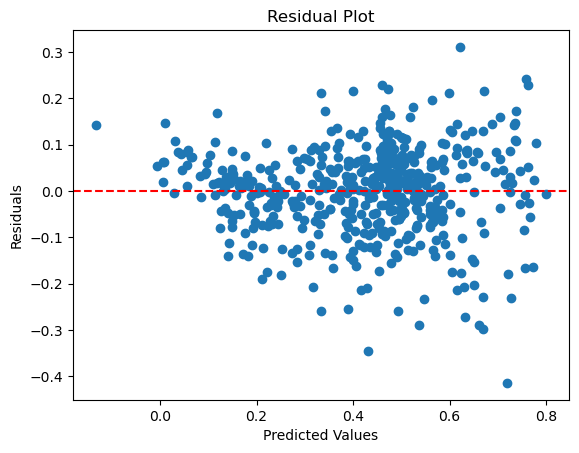

In [964]:
# Plotting scatterplot of residuals to see if the mean is around zero
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
plt.show()


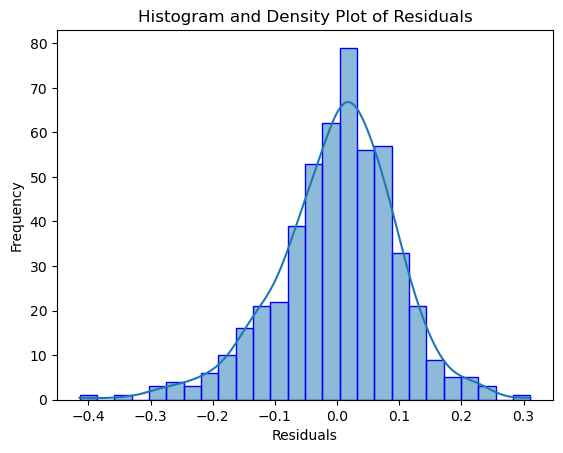

In [965]:
# Checking NORMALITY of residuals
sns.histplot(residuals, kde=True, edgecolor = 'b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plot of Residuals')
plt.show()


<b>INSIGHTS</b>

* Since the mean of residuals = 0
* Scatterplot shows residuals centered around the mean of zero
* Histogram shows NORMAL nature of residuals

HENCE, model is well-specified and fits the data appropriately without systematic bias.

<br></br>
#### Making Predictions Using the Final Model


In [966]:
# Scaling the test dataset df1e_test

In [967]:
df1e_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
510,1,0,0,0.801697,0.739836,0.753213,0.364071,0.769764,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
511,1,0,0,0.798532,0.738167,0.716795,0.397425,0.776699,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,1,1,0,0.827012,0.787883,0.695373,0.358977,0.707603,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,1,0,1,0.839669,0.779603,0.703941,0.562821,0.669777,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514,1,0,1,0.756340,0.698400,0.688946,0.230765,0.809986,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


* So now, all values of df1e_test are scaled

In [968]:
# Now we will take only the selected features from the df1e_test for prediction purposes
# The selected featueres of the model are 
X_train_const5.columns

Index(['const', 'yr', 'season_4', 'season_2', 'weathersit_3', 'atemp',
       'windspeed'],
      dtype='object')

In [969]:
# Putting the selected features in a list
select_features = ['yr', 'season_4', 'season_2', 'weathersit_3', 'atemp','windspeed']



In [970]:
# Extract selected features from df1e_test
X_test_selected = df1e_test[select_features]
y_test = df1e_test['cnt']

In [971]:
# Checking test dataset with Selected features
X_test_selected.head()

,yr,season_4,season_2,weathersit_3,atemp,windspeed
510,1,0.0,1.0,0.0,0.739836,0.364071
511,1,0.0,1.0,0.0,0.738167,0.397425
512,1,0.0,1.0,0.0,0.787883,0.358977
513,1,0.0,1.0,0.0,0.779603,0.562821
514,1,0.0,1.0,0.0,0.698400,0.230765


In [972]:
print(X_test_selected.columns)
print(X_test_selected.shape)

Index(['yr', 'season_4', 'season_2', 'weathersit_3', 'atemp', 'windspeed'], dtype='object')
(220, 6)


In [973]:
y_test.shape

(220,)

In [974]:
# Add constant term to the test data
X_test_const = sm.add_constant(X_test_selected, has_constant = 'add')

In [975]:
# Make predictions on the test data
X_test_const.shape

(220, 7)

In [976]:
print("Model parameters shape:", ols_model_5.params.shape)

Model parameters shape: (7,)


In [977]:
y_test_pred = ols_model_5.predict(X_test_const)

In [978]:
# Calculating & Plotting resuduals for the test set 
residuals_test = y_test_pred -  y_test

In [979]:
# Calculating MEAN of residuals for the Test set
residuals_test.mean().round(2)

-0.03

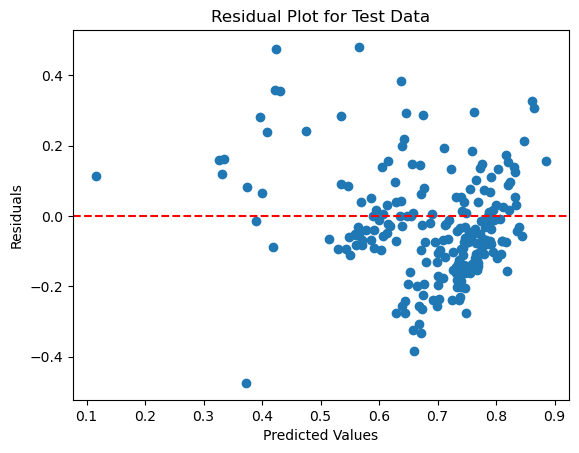

In [980]:
# Residuals plot between predicted and test data
plt.scatter(y_test_pred, residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Test Data')
plt.show()

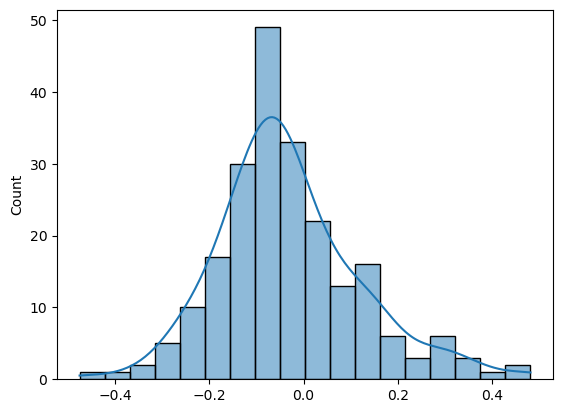

In [981]:
sns.histplot(residuals_test, kde=True, edgecolor='k')
plt.show()

In [982]:
from sklearn.metrics import r2_score

# Assuming y_test and y_test_pred are already defined
r2_squared = round(r2_score(y_test, y_test_pred)*100,3)

print("R-Squared Value:", r2_squared, '%')


R-Squared Value: 44.698 %


### INSIGHT
Comparision between Training and Testing dataset:
- Train dataset R_square          : 77.1%
- Test dataset R_square          :  44.7%

